# __Adadelta__
- A limitation of gradient descent is that it uses the same step size (learning rate) for each input variable.
- AdaGrad and RMSProp are extensions to gradient descent that add a self-adaptive learning rate for each parameter for the objective function.

- Adadelta extends AdaGrad and RMSProp by introducing consistent unit calculations for the step size, eliminating the need for an initial learning rate hyperparameter.

## Steps to Be Followed:
1. Importing the required libraries
2. Defining and plotting the objective function
3. Implementing the Adadelta algorithm
4. Optimizing the Adadelta

### Step 1: Importing the Required Libraries

- Import NumPy packages
- Import the Python package matplotlib, which sets the padding between and around the subplots as well as the figure size
- Import all other necessary libraries

In [1]:
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from math import sqrt


### Step 2: Defining and Plotting the Objective Function
- Define the objective function as the sum of squares of x and y
- Set the bounds for input variables
- Generate arrays of x and y values within the specified bounds at 0.1 increments
- Create a mesh grid from the x and y arrays
- Compute the objective function values for each combination of x and y in the mesh grid
- Create a filled contour plot with 50 contour levels and 'jet' color scheme
- Display the plot



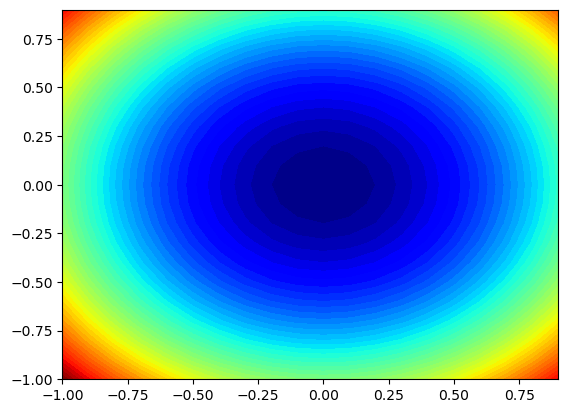

In [2]:
def objective(x, y):
    return x**2.0 + y**2.0

bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)

x, y = meshgrid(xaxis, yaxis)

results = objective(x, y)

pyplot.contourf(x, y, results, levels=50, cmap='jet')

pyplot.show()

Observation:
- The observation for the given code is that the contour plot shows a symmetric bowl-shaped pattern, indicating that the objective function has a minimum point at or near the origin (x = 0, y = 0).
- The color intensity in the plot represents the function's values, with darker regions indicating lower values and lighter regions indicating higher values.





### Step 3: Implementing Adadelta Algorithm

- Initialization and Setup:

  - **solution**: Initializes the solution with random values within the given bounds.
 - **sq_grad_avg**: Keeps track of the moving average of the squared gradients.
 - **sq_para_avg**: Keeps track of the moving average of the squared parameter updates.
 - **n_iter**, **rho**, and **ep** are hyperparameters controlling the number of iterations, decay factor, and a small constant to prevent division by zero, respectively.


- Gradient Computation and Update:

 - In each iteration, the gradient of the objective function with respect to the current solution is computed.
 - For each component of the gradient, the moving average of the squared gradient is updated with the decay factor rho.
 - Then, a new solution is computed based on the ratio of the square root of the moving averages of the squared parameter updates and the squared gradients. The current gradient is also used to calculate the change in parameters.

- Build a new solution
 - Iteratively update each variable in the solution by considering the gradient and step size specific to that variable.
 - Calculate the new position of each variable by subtracting the product of the step size and gradient from the current value and store the updated variables in a new solution

- Evaluate the solution
  - Evaluate the objective function for the candidate point defined by the new solution

In [3]:
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

def adadelta(objective, derivative, bounds, n_iter, rho, ep=1e-3):
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])

    sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]

    sq_para_avg = [0.0 for _ in range(bounds.shape[0])]

    for it in range(n_iter):

        gradient = derivative(solution[0], solution[1])

        for i in range(gradient.shape[0]):

            sg = gradient[i]**2.0

            sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0-rho))

        new_solution = list()
        for i in range(solution.shape[0]):

            alpha = (ep + sqrt(sq_para_avg[i])) / (ep + sqrt(sq_grad_avg[i]))
            change = alpha * gradient[i]
            sq_para_avg[i] = (sq_para_avg[i] * rho) + (change**2.0 * (1.0-rho))
            value = solution[i] - change

            new_solution.append(value)

        solution = asarray(new_solution)
        solution_eval = objective(solution[0], solution[1])

        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return [solution, solution_eval]

## Step 4: Optimizing the Adadelta
- Set the random seed to ensure reproducibility
- Define the bounds for the input variables
- Specify the number of iterations
- Set the value of rho for the Adadelta algorithm
- Apply the Adadelta algorithm to find the best solution and its corresponding score
- Print messages indicating the completion of the optimization process




In [4]:
seed(1)
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 120
rho = 0.99

best, score = adadelta(objective, derivative, bounds, n_iter, rho)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.15624846  0.43076118]) = 0.20997
>1 f([-0.14299468  0.41693563]) = 0.19428
>2 f([-0.12914643  0.40184605]) = 0.17816
>3 f([-0.11566994  0.38630269]) = 0.16261
>4 f([-0.10299941  0.37069192]) = 0.14802
>5 f([-0.09132837  0.35523116]) = 0.13453
>6 f([-0.08072226  0.34005317]) = 0.12215
>7 f([-0.07117441  0.32524231]) = 0.11085
>8 f([-0.06263776  0.31085275]) = 0.10055
>9 f([-0.05504377  0.29691871]) = 0.09119
>10 f([-0.04831412  0.28346065]) = 0.08268
>11 f([-0.04236781  0.27048927]) = 0.07496
>12 f([-0.03712545  0.25800822]) = 0.06795
>13 f([-0.03251183  0.24601593]) = 0.06158
>14 f([-0.02845711  0.234507  ]) = 0.05580
>15 f([-0.02489748  0.22347322]) = 0.05056
>16 f([-0.02177521  0.21290424]) = 0.04580
>17 f([-0.01903851  0.20278822]) = 0.04149
>18 f([-0.01664114  0.19311222]) = 0.03757
>19 f([-0.01454205  0.18386255]) = 0.03402
>20 f([-0.01270485  0.17502504]) = 0.03080
>21 f([-0.01109744  0.16658525]) = 0.02787
>22 f([-0.00969149  0.15852865]) = 0.02523
>23 f([-0.00846208  0

**Observation:**
- The Adadelta algorithm is applied with 120 iterations, a momentum value of 0.99, and seed 1, resulting in a convergence to the best solution and its corresponding score.